In [19]:
%matplotlib inline
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import imagesc as imagesc

In [20]:
longi="-119.349"
lat="36.1352"

In [21]:
lon_south=pd.read_csv('InSAR_data_south/longitude.csv')
lat_south=pd.read_csv('InSAR_data_south/latitude.csv')
CSVpath="E:/DSFellowship/InSAR_data_south/displacement/CSV/"
# load one file


In [22]:
displacement=[]
date=[]
for f in os.listdir(CSVpath):
    #print(f)
    name, ext=os.path.splitext(f)
    date.append(int(name))
    # change columns and index names into lon and lat
date.sort()



In [23]:
for f in date:
    z_south=pd.read_csv(CSVpath+str(f)+'.csv')
    z_south.columns=lon_south.columns
    z_south.index=lat_south.columns[:-1]
    #displacement
    displacement.append(z_south.loc[lat,longi])
print(displacement)

[0.0, -2.348, 0.29425, -1.0649, -2.7628, -3.1882, -5.0385, -6.7351, -10.232, -11.704, -12.48, -15.882, -19.311, -19.25, -18.395, -19.052, -18.866, -17.181, -20.001, -18.252, -17.879, -17.695, -19.939, -19.501, -20.068, -18.843, -21.166, -21.547, -21.667, -24.297, -24.272, -26.189, -30.104, -29.224, -31.22, -31.712, -32.181, -31.71, -34.99, -33.107, -32.633, -32.061, -33.858, -32.703, -32.967, -33.313, -33.235, -32.664, -33.158, -31.862, -32.689, -32.278, -30.776, -33.29, -33.515, -32.221, -31.883, -32.633, -33.028, -34.111, -35.192, -35.117, -35.778, -35.954, -37.331, -36.74, -34.658, -37.256, -38.246, -37.072, -38.136, -39.604, -36.93, -36.243, -37.927, -37.516, -37.033, -36.377, -36.53, -37.913, -39.063, -38.884, -37.511, -38.593, -40.715, -38.405, -40.567, -39.468, -41.736, -42.835, -44.341, -43.344, -44.155, nan, -46.06, -47.983, -49.04, -50.19, -48.78, -50.701, -49.764, -49.891, -49.823, -49.173, -49.986, -48.972, -48.171, -48.865, -49.518, -49.159]


In [24]:
for f in range(len(displacement)):
    if(np.isnan(displacement[f])):
        if(f==0):
            displacement[f]=0
        else:
            displacement[f]=(displacement[f-1]+displacement[f+1])/2

In [25]:
print(displacement)

[0.0, -2.348, 0.29425, -1.0649, -2.7628, -3.1882, -5.0385, -6.7351, -10.232, -11.704, -12.48, -15.882, -19.311, -19.25, -18.395, -19.052, -18.866, -17.181, -20.001, -18.252, -17.879, -17.695, -19.939, -19.501, -20.068, -18.843, -21.166, -21.547, -21.667, -24.297, -24.272, -26.189, -30.104, -29.224, -31.22, -31.712, -32.181, -31.71, -34.99, -33.107, -32.633, -32.061, -33.858, -32.703, -32.967, -33.313, -33.235, -32.664, -33.158, -31.862, -32.689, -32.278, -30.776, -33.29, -33.515, -32.221, -31.883, -32.633, -33.028, -34.111, -35.192, -35.117, -35.778, -35.954, -37.331, -36.74, -34.658, -37.256, -38.246, -37.072, -38.136, -39.604, -36.93, -36.243, -37.927, -37.516, -37.033, -36.377, -36.53, -37.913, -39.063, -38.884, -37.511, -38.593, -40.715, -38.405, -40.567, -39.468, -41.736, -42.835, -44.341, -43.344, -44.155, -45.1075, -46.06, -47.983, -49.04, -50.19, -48.78, -50.701, -49.764, -49.891, -49.823, -49.173, -49.986, -48.972, -48.171, -48.865, -49.518, -49.159]


In [26]:
data_tuples=list(zip(date,displacement))
df=pd.DataFrame(data_tuples, columns=['Date','Disp'])
print(df.size)
df_np=df.to_numpy()
print(df_np.shape)

220
(110, 2)


In [27]:
df.iloc[:, 0:1].values

array([[20141108],
       [20141202],
       [20141226],
       [20150212],
       [20150308],
       [20150401],
       [20150425],
       [20150519],
       [20150612],
       [20150706],
       [20150730],
       [20150823],
       [20150916],
       [20151010],
       [20151103],
       [20151127],
       [20151209],
       [20151221],
       [20160114],
       [20160126],
       [20160207],
       [20160219],
       [20160302],
       [20160314],
       [20160326],
       [20160407],
       [20160419],
       [20160501],
       [20160513],
       [20160525],
       [20160606],
       [20160630],
       [20160724],
       [20160817],
       [20160910],
       [20160922],
       [20161004],
       [20161016],
       [20161028],
       [20161109],
       [20161121],
       [20161203],
       [20161215],
       [20161227],
       [20170108],
       [20170114],
       [20170120],
       [20170126],
       [20170201],
       [20170213],
       [20170225],
       [20170309],
       [2017

In [28]:
df

,Date,Disp
0,20141108,0.00000
1,20141202,-2.34800
2,20141226,0.29425
3,20150212,-1.06490
4,20150308,-2.76280
...,...,...
105,20181205,-48.97200
106,20181217,-48.17100
107,20181229,-48.86500
108,20190110,-49.51800


In [29]:
from datetime import timedelta
import calendar
df.index=pd.to_datetime(df['Date'], format='%Y%m%d')

<AxesSubplot:xlabel='Date'>

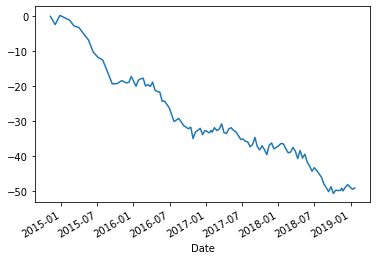

In [30]:
temp=df['Disp']
temp.plot()

In [38]:


# Random Forest Regression


# Importing the datasets df.index=pd.to_datetime(df['Date'], format='%Y%m%d')
X = df.iloc[:, 0:1].values
Y = df.iloc[:, 1:2].values
#X = [pd.to_datetime(x, format='%Y%m%d') for x in X]
print(X[0])
#print(Y)

DatetimeIndex(['2014-11-08'], dtype='datetime64[ns]', freq=None)


C:\Users\jupad\AppData\Local\Temp\ipykernel_13600\1953530892.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X,Y)


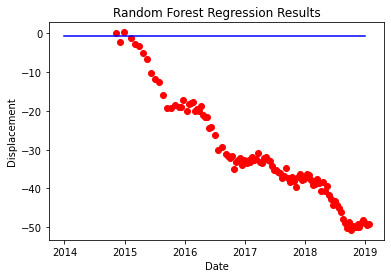

In [41]:


# Fitting the Regression model to the dataset

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor.fit(X,Y)

# Predicting a new result with the Random Forest Regression

Y_Pred = regressor.predict(np.array([6.5]).reshape(-1, 1))

# Visualising the Random Forest Regression results in higher resolution and smoother curve
X_Grid=np.arange(np.datetime64("2014-01-01"), np.datetime64("2020-01-01"), np.timedelta64(1, 'Y'), dtype='datetime64[Y]').astype('datetime64[D]')
#X_Grid = np.arange(min(X), max(X), 0.01)
X_Grid = X_Grid.reshape((len(X_Grid), 1))
plt.scatter(X,Y, color = 'red')
plt.plot(X_Grid, regressor.predict(X_Grid), color = 'blue')
plt.title('Random Forest Regression Results')
plt.xlabel('Date')
plt.ylabel('Displacement')
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
imputer = Imputer()
y_imputed = imputer.fit_transform(date)
sklearn_model=LinearRegression().fit(df_np.reshape(110,2), date)

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (c:\Python\Python310\lib\site-packages\sklearn\preprocessing\__init__.py)